<a href="https://colab.research.google.com/github/Soldatwar/EIE-401_Gallardo_Felipe_Actividades/blob/main/Actividad_2/Actividad_2_GallardoFelipe_ID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 2</h2></center>
<center><h3>Fundamentos: Análisis espectral</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Felipe Gallardo</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Carga archivos y carga datos en python
<p align="justify">
Una de las tareas más importantes es la de cargar archivos que incluyan datos para el procesamiento.

<p align="justify">
Debes cargar los dos archivos en formato txt y CSV, adquirir los datos y presentarlos en graficos usando la librería Matplotlib
    
    

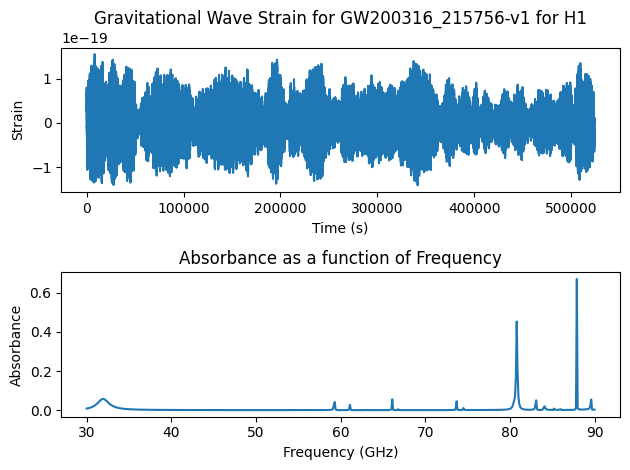

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
import scipy.signal as sg
from scipy import interpolate

# URL del archivo .txt
url_txt = 'https://raw.githubusercontent.com/Soldatwar/EIE-401_Gallardo_Felipe_Actividades/main/Actividad_2/H-H1_GWOSC_16KHZ_R1-1268431079-32.txt'
url_csv = 'https://raw.githubusercontent.com/Soldatwar/EIE-401_Gallardo_Felipe_Actividades/main/Actividad_2/AbsorbanceTE_0-0.csv'

# Carga de archivos
arch_txt = np.genfromtxt(urlopen(url_txt), skip_header=3)
arch_csv = np.loadtxt(urlopen(url_csv), delimiter=',', skiprows=1)

fig, ax = plt.subplots(2, 1)

# Grafica del archivo .txt
ax[0].plot(arch_txt)
ax[0].set_title('Gravitational Wave Strain for GW200316_215756-v1 for H1')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Strain')

# Grafica del archivo .csv
ax[1].plot(arch_csv[:, 0], arch_csv[:, 1])
ax[1].set_title('Absorbance as a function of Frequency')
ax[1].set_xlabel('Frequency (GHz)')
ax[1].set_ylabel('Absorbance')

plt.tight_layout()
plt.show()


## 2. Señal
<p align="justify">
Crea una señal continua (la suma de dos senoidales/cosenoidales, exponenciales) que utilizaras para las demostraciones siguientes. Presenta la función que usaste en una gráfica de tal forma que la ecuación esté incluida en dicha gráfica.

Incluye la ecuación en una celda de tu notebook usando LATEX.


\begin{align*}
f_1(x) & = \sin^2(2 \pi f t) \\
f_2(x) & = \sin^2(2 \pi f t) \\
\hspace{-2em} f(x) & = f_1 + f_2
\end{align*}

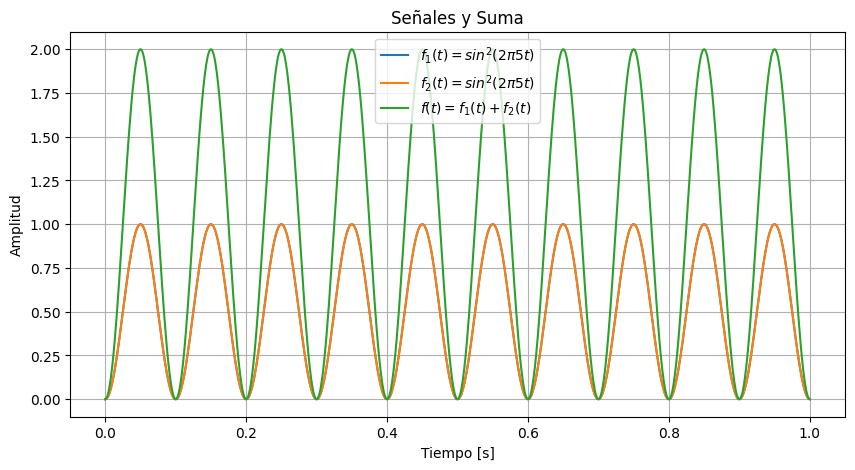

In [59]:
# Definir el tiempo
f = 5
t1 = np.linspace(0, 1, 1000)

# Crear las señales senoidales
señalsen1 = np.sin(2 * np.pi * f * t1) ** 2
señalsen2 = np.sin(2 * np.pi * f * t1) ** 2

# Sumar las señales
suma_s = señalsen1 + señalsen2

# Graficar las señales
plt.figure(figsize=(10,5))
plt.plot(t1, señalsen1, label='$f_1(t) = sin^2(2\pi 5t)$')
plt.plot(t1, señalsen2, label='$f_2(t) = sin^2(2\pi 5t)$')
plt.plot(t1, suma_s, label='$f(t) = f_1(t) + f_2(t)$')
plt.title('Señales y Suma')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

## 3. Sampleo
<p align="justify">
En este punto debes comprobar como se da la operación de sampleo y que sucede ante cambios en el intervalo de sampleo.    


### 3.1 Crea una señal impulso (delta) y desplazala
Para esto puedes usar alguna librería de python

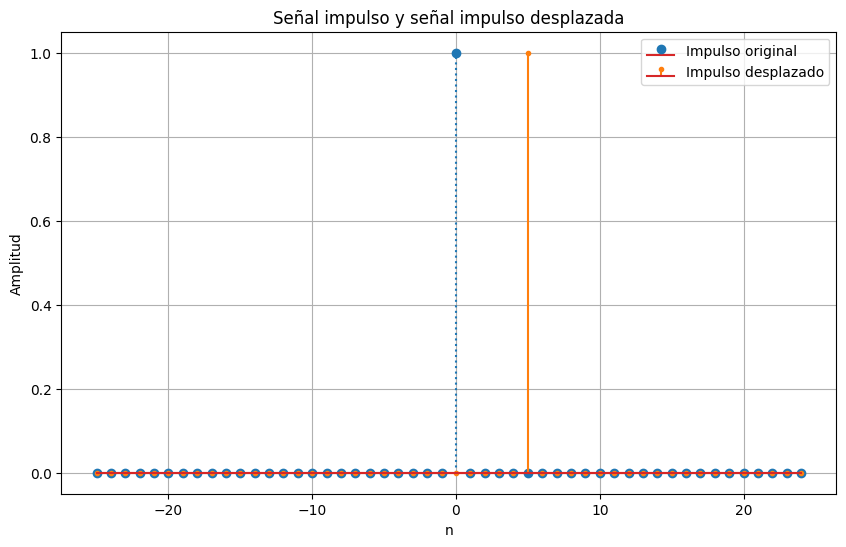

In [60]:
# Crear una señal impulso (delta)
n = np.arange(-25, 25)
impulso = sg.unit_impulse(len(n), 'mid')

# Desplazar la señal impulso
desplazamiento = 5
indice_central = len(n) // 2
impulso_desplazado = sg.unit_impulse(len(n), indice_central + desplazamiento)

# Graficar las señales
plt.figure(figsize=(10, 6))
plt.stem(n, impulso, linefmt='C0:', markerfmt='C0o', label='Impulso original')
plt.stem(n, impulso_desplazado, linefmt='C1-', markerfmt='C1.', label='Impulso desplazado')
plt.title('Señal impulso y señal impulso desplazada')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

### 3.2 Genere una señal Senoidal y realice la operación de sampleo
Puedes utilizar el método "stem" de matplotlib para plotear el resultado.

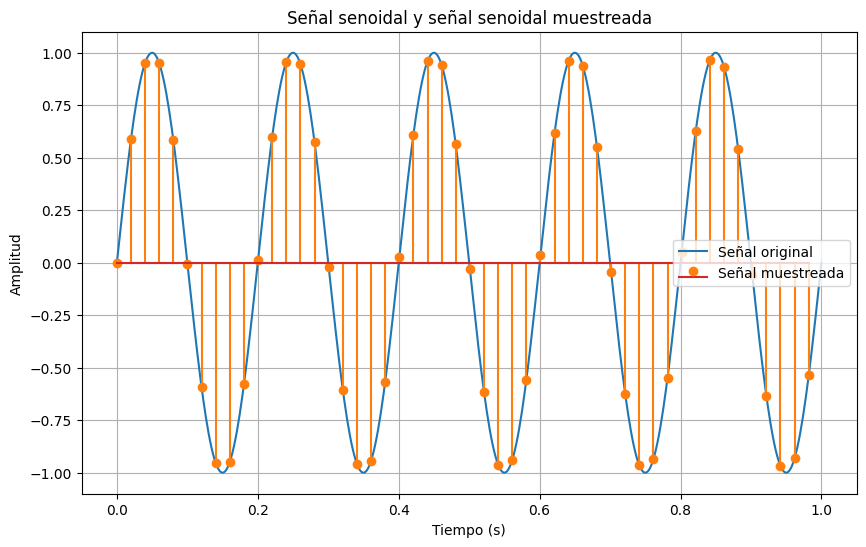

In [61]:
# Parámetros de la señal
f = 5
fs = 10

# Generar la señal senoidal
t = np.linspace(0, 1, 500)
señal = np.sin(2 * np.pi * f * t)

# Realizar la operación de sampleo
señal_sampleada = señal[::fs]

# Graficar la señal original y la señal muestreada
plt.figure(figsize=(10, 6))
plt.plot(t, señal, label='Señal original')
plt.stem(t[::fs], señal_sampleada, linefmt='C1-', markerfmt='C1o', label='Señal muestreada')
plt.title('Señal senoidal y señal senoidal muestreada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

### 3.3 Genere una señal Triangular y realice la operación de sampleo

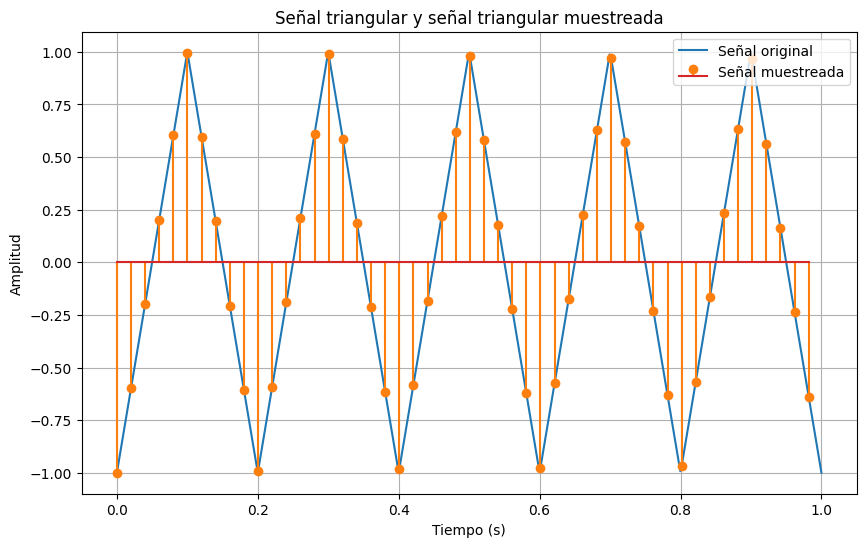

In [62]:
# Parámetros de la señal
fs = 10

# Generar la señal triangular
t = np.linspace(0, 1, 500)
señal = sg.sawtooth(2 * np.pi * 5 * t, 0.5)

# Realizar la operación de sampleo
señal_sampleada = señal[::fs]

# Graficar la señal original y la señal muestreada
plt.figure(figsize=(10, 6))
plt.plot(t, señal, label='Señal original')
plt.stem(t[::fs], señal_sampleada, linefmt='C1-', markerfmt='C1o', label='Señal muestreada')
plt.title('Señal triangular y señal triangular muestreada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

### 3.4 Realice la operación de sampleo sobre la señal que generaste en el punto 2

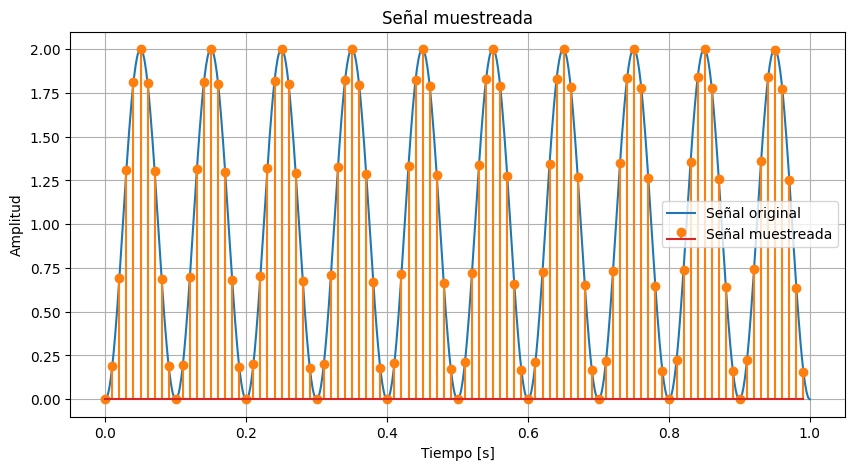

In [63]:
# Definir el factor de muestreo
fs = 10

# Realizar el muestreo
suma_s_muestreada = suma_s[::fs]

# Graficar la señal muestreada
plt.figure(figsize=(10, 5))
plt.plot(t1, suma_s, label='Señal original')
plt.stem(t1[::fs], suma_s_muestreada, linefmt='C1-', markerfmt='C1o', label='Señal muestreada')
plt.title('Señal muestreada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


### 3.5 Compruebe el teorema de Nyquist
Para comprobarlo, debes evaluar algunos casos:
1. la frecuencia de sampleo _f_ es mayor que la frecuencia máxima de tu señal, Fmax.
2. la frecuencia de sampleo _f_ es mayor que 2*Fmax.
3. la frecuencia de sampleo _f_ es mayor que 5*Fmax.

<p align="justify">
Debe graficar:

1. la señal original.
2. la señal sampleada.
3. la señal reconstruida a partir del sampleo.

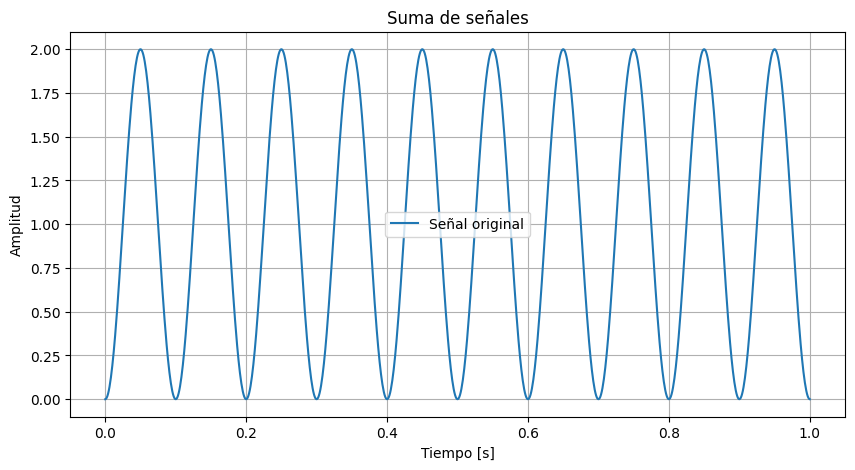

In [64]:
# Grafica señal original
plt.figure(figsize=(10,5))
plt.plot(t1, suma_s, label='Señal original')
plt.title('Suma de señales')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

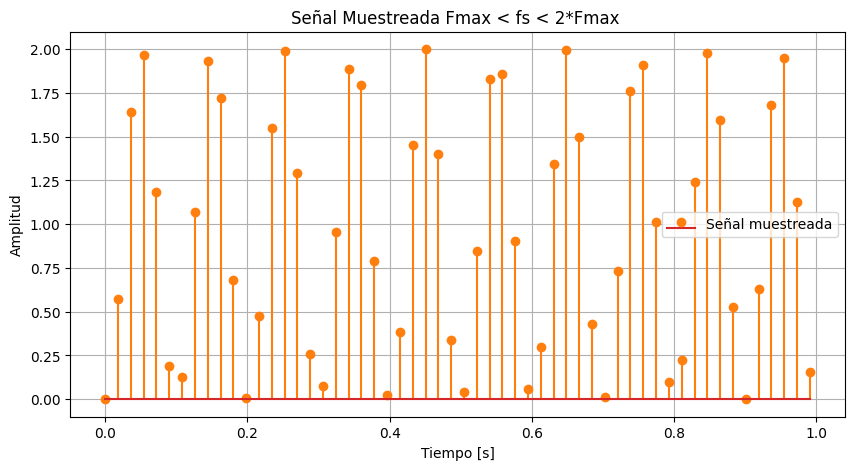

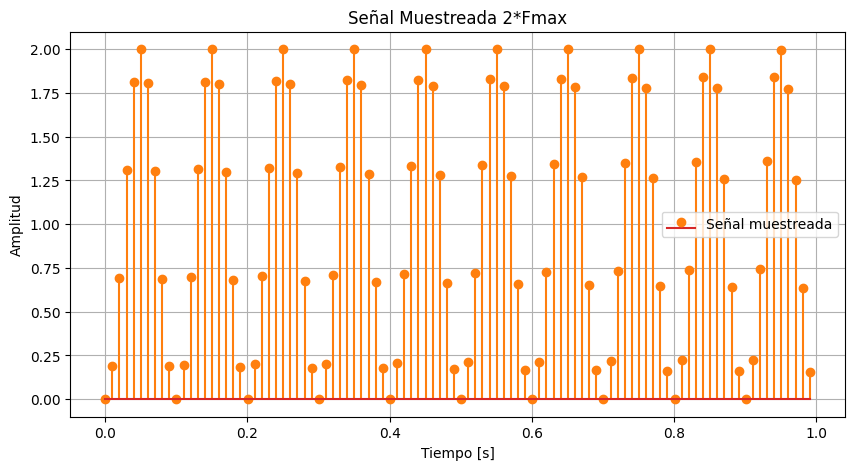

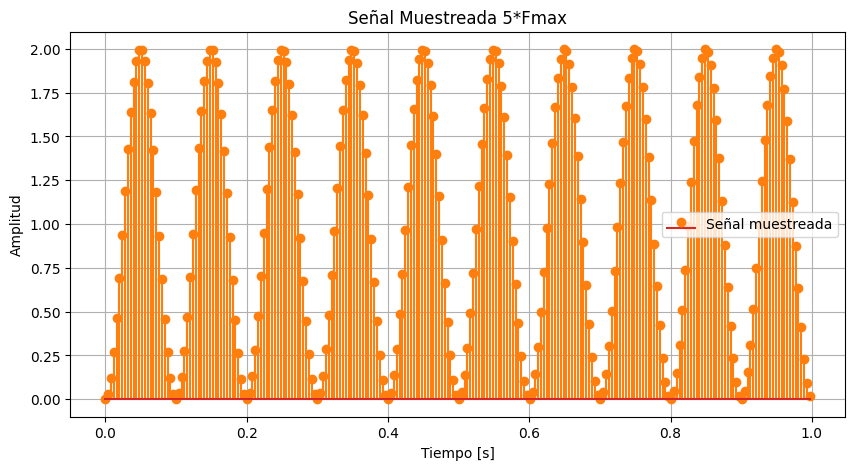

In [65]:
# Parámetros de la señal
fs1 = 18  # Equivalenta a Fmax < fs < 2*Fmax
fs2 = 10  # Equivalenta a 2*Fmax
fs3 = 4   # Equivalenta a 5*Fmax

# Generar la señal triangular
t1 = np.linspace(0, 1, 1000)

fs = 10

# Realizar el muestreo
suma_s_muestreada = suma_s[::fs1]
suma_s_muestreada2 = suma_s[::fs2]
suma_s_muestreada3 = suma_s[::fs3]

# Graficar la señal muestreada
plt.figure(figsize=(10, 5))
plt.stem(t1[::fs1], suma_s_muestreada, linefmt='C1-', markerfmt='C1o', label='Señal muestreada')
plt.title('Señal Muestreada Fmax < fs < 2*Fmax ')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

# Graficar la señal muestreada
plt.figure(figsize=(10, 5))
plt.stem(t1[::fs2], suma_s_muestreada2, linefmt='C1-', markerfmt='C1o', label='Señal muestreada')
plt.title('Señal Muestreada 2*Fmax')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

# Graficar la señal muestreada
plt.figure(figsize=(10, 5))
plt.stem(t1[::fs3], suma_s_muestreada3, linefmt='C1-', markerfmt='C1o', label='Señal muestreada')
plt.title('Señal Muestreada 5*Fmax')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

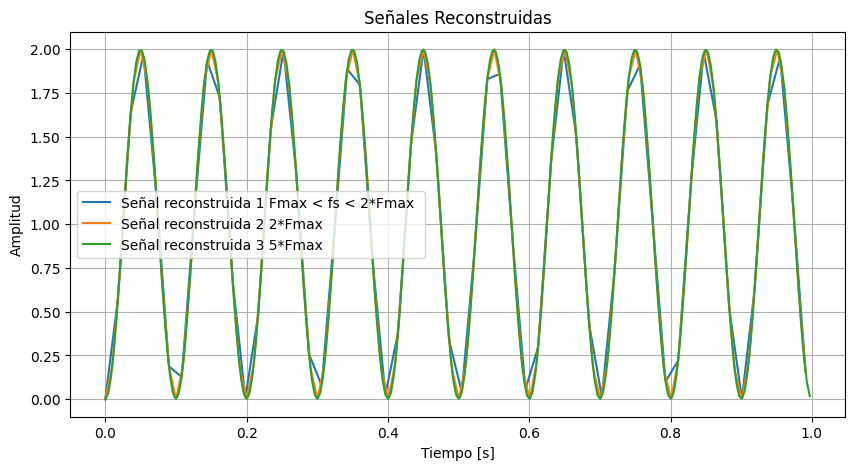

In [66]:
# Interpolación
f1 = interpolate.interp1d(t1[::fs1], suma_s_muestreada, kind='linear')
f2 = interpolate.interp1d(t1[::fs2], suma_s_muestreada2, kind='linear')
f3 = interpolate.interp1d(t1[::fs3], suma_s_muestreada3, kind='linear')

# Tiempo para las señales reconstruidas
t_i1 = np.linspace(min(t1[::fs1]), max(t1[::fs1]), 1000)
t_i2 = np.linspace(min(t1[::fs2]), max(t1[::fs2]), 1000)
t_i3 = np.linspace(min(t1[::fs3]), max(t1[::fs3]), 1000)

# Señales reconstruidas
suma_s_reconstruida1 = f1(t_i1)
suma_s_reconstruida2 = f2(t_i2)
suma_s_reconstruida3 = f3(t_i3)

# Graficar las señales reconstruidas
plt.figure(figsize=(10, 5))
plt.plot(t_i1, suma_s_reconstruida1, label='Señal reconstruida 1 Fmax < fs < 2*Fmax ')
plt.plot(t_i2, suma_s_reconstruida2, label='Señal reconstruida 2 2*Fmax')
plt.plot(t_i3, suma_s_reconstruida3, label='Señal reconstruida 3 5*Fmax')
plt.title('Señales Reconstruidas')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

### 3.6 Explica tus hallazgos

Se investigaron diversos métodos para la realización de lo pedido en la actividad, que consistía en cargar dos bases de datos en .txt y .csv, por medio de URL en formato raw para obtener los datos en bruto, permitiendo que sean leídos por la biblioteca numpy.

Las dos operaciones principales que se trataron fueron el muestreo y la interpolación lineal, para la digitalización de señales continuas y posteriormente su reconstrucción.

El muestreo, también conocido como “sampleo”, es un proceso clave en el procesamiento de señales digitales. Este proceso convierte una señal continua (como una función de tiempo o espacio) en una secuencia numérica, tomando muestras de la señal en intervalos de tiempo discretos.

El teorema de muestreo de Nyquist-Shannon establece que una señal puede ser perfectamente reconstruida a partir de sus muestras si la tasa de muestreo es más del doble de su ancho de banda (la frecuencia más alta presente en la señal). Esta tasa se conoce como la tasa de Nyquist.

Si la tasa de muestreo es demasiado baja (menos del doble de la frecuencia más alta de la señal), se produce un efecto llamado “aliasing”. En este caso, las frecuencias altas en la señal se “disfrazan” como frecuencias más bajas en la señal muestreada.

La interpolación es un proceso que permite estimar valores dentro de un cierto rango a partir de un conjunto de puntos conocidos. En el contexto del procesamiento de señales, la interpolación se utiliza para reconstruir una señal continua a partir de una secuencia de muestras discretas.

Con respecto al teorema de Nyquist-Shannon, el cual indica que la frecuencia de muestreo debe ser al menos dos veces la frecuencia máxima, se observa que al momento de realizar un muestreo con una frecuencia algo mayor a la frecuencia máxima de la señal original, se obtiene una señal con cortes irregulares al momento de su reconstrucción. En el caso de respetar el teorema y usar una frecuencia del doble de la máxima, se obtiene de este modo una señal reconstruida de forma correcta sin mucha pérdida de información. Por último, si se aumenta aún más la frecuencia de muestreo, menor es la distancia entre muestras, obteniendo una señal prácticamente sin pérdida de información.

## 4. Referencias
<p align="justify">
    

[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py